# Multiple Linear Regression
- training and test split, some standardization
- creating custom function to measure performance

#### Ordinary Least Squares 
- quick glance at performance on test

#### Lasso
- using LassoCV to capture best alpha
- **removing features with low coefficients

#### GridsearchCV
- hypertuing and capturing best alpha 

In [88]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection

pd.set_option('display.max_columns', None)



### Reading the feature engineered Dataset

In [89]:
dummy = pd.read_csv('../nicole/data/dummy_nicole_feature_engineered.csv')


In [90]:
dummy.head()


,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,MoSold,YrSold,lat,long,TotalPorchSF,TotalBR,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,856.0,126000,30,64.9,7890.0,6,6,1939.0,1950.0,0.0,3,3,3,3,1,3,238.0,0.0,618.0,856.0,3,856.0,0.0,0,2,3,4,1,4,2.0,399.0,3,3,0.0,3,2010,42.017780,-93.651452,166.0,2.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
1,1049.0,139500,120,42.0,4235.0,5,5,1984.0,1984.0,149.0,4,3,4,3,2,6,552.0,393.0,104.0,1049.0,3,1049.0,0.0,0,2,4,5,0,0,1.0,266.0,3,3,0.0,2,2009,42.024697,-93.664186,105.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
2,1049.0,139500,120,42.0,4235.0,5,5,1984.0,1984.0,149.0,4,3,4,3,2,6,552.0,393.0,104.0,1049.0,3,1049.0,0.0,0,2,4,5,0,0,1.0,266.0,3,3,0.0,2,2009,42.024697,-93.664186,105.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
3,1001.0,124900,30,60.0,6060.0,5,9,1930.0,2007.0,0.0,4,3,3,3,1,5,737.0,0.0,100.0,837.0,5,1001.0,0.0,0,2,4,5,0,0,1.0,216.0,3,1,154.0,11,2007,42.021389,-93.614855,128.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,1039.0,114000,70,80.0,8146.0,4,8,1900.0,2003.0,0.0,4,4,2,3,1,1,0.0,0.0,405.0,405.0,4,717.0,322.0,0,2,3,6,0,0,1.0,281.0,3,3,0.0,5,2009,42.038070,-93.612065,279.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1


In [91]:
dummy.dtypes


GrLivArea            float64
SalePrice              int64
MSSubClass             int64
LotFrontage          float64
LotArea              float64
                      ...   
GarageType_Detchd      int64
GarageType_None        int64
GarageFinish_None      int64
GarageFinish_RFn       int64
GarageFinish_Unf       int64
Length: 124, dtype: object

# Multiple Linear Regression
https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c

### Simple MLR
https://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia

#### Splitting the data into training & testing, fitting, and standardization

In [92]:
#Setting the value for X and Y
X = dummy.drop(['SalePrice','lat','long'], axis = 1)

y = dummy['SalePrice']
log_y = np.log(y)


In [93]:
X.head(20)


,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,MoSold,YrSold,TotalPorchSF,TotalBR,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,856.0,30,64.9,7890.0,6,6,1939.0,1950.0,0.0,3,3,3,3,1,3,238.0,0.0,618.0,856.0,3,856.0,0.0,0,2,3,4,1,4,2.0,399.0,3,3,0.0,3,2010,166.0,2.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
1,1049.0,120,42.0,4235.0,5,5,1984.0,1984.0,149.0,4,3,4,3,2,6,552.0,393.0,104.0,1049.0,3,1049.0,0.0,0,2,4,5,0,0,1.0,266.0,3,3,0.0,2,2009,105.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
2,1049.0,120,42.0,4235.0,5,5,1984.0,1984.0,149.0,4,3,4,3,2,6,552.0,393.0,104.0,1049.0,3,1049.0,0.0,0,2,4,5,0,0,1.0,266.0,3,3,0.0,2,2009,105.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
3,1001.0,30,60.0,6060.0,5,9,1930.0,2007.0,0.0,4,3,3,3,1,5,737.0,0.0,100.0,837.0,5,1001.0,0.0,0,2,4,5,0,0,1.0,216.0,3,1,154.0,11,2007,128.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,1039.0,70,80.0,8146.0,4,8,1900.0,2003.0,0.0,4,4,2,3,1,1,0.0,0.0,405.0,405.0,4,717.0,322.0,0,2,3,6,0,0,1.0,281.0,3,3,0.0,5,2009,279.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
5,1665.0,60,70.0,8400.0,8,6,2001.0,2001.0,0.0,4,3,4,3,1,6,643.0,0.0,167.0,810.0,5,810.0,855.0,0,3,4,6,0,0,2.0,528.0,3,3,0.0,11,2009,45.0,3.5,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
6,1922.0,85,64.0,7301.0,7,5,2003.0,2003.0,500.0,4,3,0,0,0,0,0.0,0.0,0.0,0.0,5,495.0,1427.0,0,4,4,7,1,5,2.0,672.0,3,3,0.0,7,2009,177.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [97]:
from sklearn.model_selection import train_test_split

#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, log_y, test_size = 0.2, random_state = 4)

In [98]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
standard = StandardScaler()

#fitting standardization and transforming
X_train_scaled = scaler.fit_transform(X_train)

In [99]:
from sklearn.linear_model import LinearRegression

#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(X_train, y_train)


LinearRegression()

#### MLR Model Equation

In [100]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))


Intercept:  12.271126062278071
Coefficients:


[('GrLivArea', 0.00016164152049921883),
 ('MSSubClass', -0.0006395732499080118),
 ('LotFrontage', -0.00013810825912089115),
 ('LotArea', 2.3477061519581386e-06),
 ('OverallQual', 0.05401538125638308),
 ('OverallCond', 0.04213400315898642),
 ('YearBuilt', 0.0020670860133411477),
 ('YearRemodAdd', 0.0004969732035818685),
 ('MasVnrArea', 6.115787272610445e-05),
 ('ExterQual', 0.006816498235799081),
 ('ExterCond', -0.008554145067994429),
 ('BsmtQual', 0.0074418843130792675),
 ('BsmtCond', -0.0011125117602224994),
 ('BsmtExposure', 0.014415979444500342),
 ('BsmtFinType1', 0.005808792575612613),
 ('BsmtFinSF1', 5.51880040141825e-05),
 ('BsmtFinSF2', 2.838185930451563e-05),
 ('BsmtUnfSF', -1.065759541014899e-05),
 ('TotalBsmtSF', 7.291226852313218e-05),
 ('HeatingQC', 0.01182380905315473),
 ('1stFlrSF', 0.00011976199483457184),
 ('2ndFlrSF', 9.779500242032557e-05),
 ('LowQualFinSF', -5.591547674286103e-05),
 ('BedroomAbvGr', -0.008133700867378045),
 ('KitchenQual', 0.01846258435853599),
 ('To

#### Predicted and actual values

In [ ]:
#Prediction of test set
y_test_predict = mlr.predict(X_test)

#Predicted values
print("Prediction for test set: {}".format(y_test_predict))


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_test_predict})
mlr_diff.head()

### Evaluating the Model

In [101]:
#fitting to training and evaluating on test dataset with R^2

mlr = LinearRegression()
mlr.fit(X_train, y_train)

print(f'R2 score on training data: {round(mlr.score(X_train, y_train),3)}')
print(f'R2 score on test data: {round(mlr.score(X_test, y_test),3)}')


R2 score on training data: 0.94
R2 score on test data: 0.867


In [102]:
#Model evaluation with root mean squared error, calculate RMSE

y_test_predict = mlr.predict(X_test)

print(f'Root Mean Square Error of model on test data is: \
{np.round(mean_squared_error(y_test, y_test_predict)**0.5,3)}')

print(f'Root Mean Square Error of model on train data is: \
{np.round(mean_squared_error(y_train, mlr.predict(X_train))**0.5, 3)}')

Root Mean Square Error of model on test data is: 0.147
Root Mean Square Error of model on train data is: 0.094


In [33]:
# Define a function to plot predictions vs actuals

def plot_y_yhat(y, yhat):
    '''This function accepts 2 series and plots a scatter plot of y vs yhat.
    The function also plots an x=y line to demonstrate the 'perfect model', 
    where y = yhat'''

    plt.figure(figsize=(5,5))

    plt.scatter(y, yhat, color='mediumorchid', s=4, label='Predicted vs. Actual', alpha=0.7 )

    # Plot 'perfect model' (x=y) line on plot
    max_val = np.max(y)
    plt.plot([0, max_val*1.05], [0, max_val*1.05], color='navy',
            linewidth=2.0, alpha=0.5, label='Perfect model', )
    
    # Add grid to plot
    plt.grid(color='lightgrey', linewidth=0.7, linestyle='--')
    
    plt.xlabel('Actual Sale Price ($)')
    plt.xlim(0,max_val*1.05)

    plt.ylabel('Predicted Sale Price ($)')
    plt.ylim(0,max_val*1.05)
    
    plt.title('Plot of predicted values vs. actual values')
    plt.legend() 
    plt.show()
    

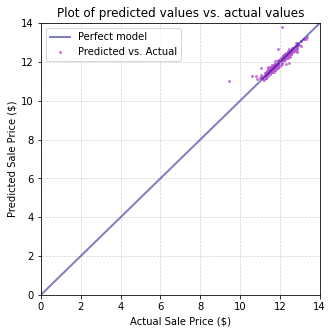

In [103]:
# Call function to plot model predictions vs actual test values
plot_y_yhat(y_test, mlr.predict(X_test))

In [104]:
# Display descriptive statistics for model predictions
pd.DataFrame(mlr.predict(X_test), columns=['Predicted Sales Price']).describe()

,Predicted Sales Price
count,525.000000
mean,12.008375
std,0.380187
min,11.041016
25%,11.755344
50%,11.957943
75%,12.251003
max,13.801676


In [105]:
# Display 10 largest model residuals, where prediction underestimated actual sale price 
df = pd.DataFrame({'Actual':y_test,'Prediction':mlr.predict(X_test)})
df['Residual'] = df['Actual'] - df['Prediction']
df.sort_values('Residual', inplace=True, ascending=False)
df.head(10)

,Actual,Prediction,Residual
2469,12.468437,11.955598,0.512838
1915,12.283034,11.896291,0.386742
78,12.880292,12.526080,0.354212
2037,13.071070,12.811785,0.259285
24,12.491173,12.264378,0.226794
1234,12.793859,12.578587,0.215273
301,12.100156,11.890623,0.209533
2021,11.982304,11.776774,0.205530
1699,11.703546,11.504137,0.199409
1983,12.001505,11.804736,0.196770


In [106]:
# Display 10 largest negative residuals, where prediction overestimated actual sale price 
df.tail(10)

,Actual,Prediction,Residual
517,11.050890,11.317363,-0.266473
1435,11.775290,12.042803,-0.267514
511,11.407565,11.690197,-0.282632
2241,11.407565,11.751629,-0.344064
210,10.819778,11.304612,-0.484834
1558,11.041048,11.692503,-0.651455
750,10.596635,11.257934,-0.661299
280,11.918391,12.690213,-0.771822
434,9.456341,11.041016,-1.584675
315,12.126759,13.801676,-1.674917


In [107]:
# Display 10 largest negative residuals, where prediction overestimated actual sale price 
df.tail(10)

,Actual,Prediction,Residual
517,11.050890,11.317363,-0.266473
1435,11.775290,12.042803,-0.267514
511,11.407565,11.690197,-0.282632
2241,11.407565,11.751629,-0.344064
210,10.819778,11.304612,-0.484834
1558,11.041048,11.692503,-0.651455
750,10.596635,11.257934,-0.661299
280,11.918391,12.690213,-0.771822
434,9.456341,11.041016,-1.584675
315,12.126759,13.801676,-1.674917


# Cross validation and Regularization gridsearch
I'll now see if I can improve on the model performance with regularisation.

### GridSearch CV with Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter=3000)

# define grid
grid = dict()
grid['alpha'] = np.logspace(-4,3,5000)

# Perform a lasso regularisation gridsearch
gs = GridSearchCV(lasso, grid, cv=5, return_train_score=True, refit=True)
gs.fit(X_train, y_train)
gs.best_params_

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.933e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.575e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.931e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.514e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.585e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.685e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.525e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.951e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.697e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.947e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.964e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.603e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.958e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.542e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.614e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.554e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.983e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.726e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.976e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.632e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.987e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.572e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.644e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.745e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.585e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.017e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.758e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.006e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.031e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.663e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.018e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.604e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.675e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.777e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.617e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.052e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.790e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.037e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.066e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.694e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.049e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.637e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.707e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.811e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.650e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.089e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.825e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.069e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.103e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.727e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.082e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.671e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.740e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.846e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.685e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.127e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.861e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.103e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.142e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.761e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.117e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.707e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.775e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.884e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.722e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.166e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.899e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.138e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.182e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.796e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.152e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.744e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.810e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.922e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.760e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.207e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.938e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.175e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.224e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.831e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.189e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.784e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.846e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.963e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.799e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.250e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.979e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.212e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.267e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.868e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.227e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.824e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.883e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.005e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.841e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.295e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.022e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.251e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.312e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.906e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.266e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.867e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.920e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.049e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.884e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.341e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.067e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.291e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.359e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.944e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.307e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.912e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.095e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.930e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.389e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.114e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.332e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.983e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.349e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.958e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.999e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.144e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.977e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.438e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.163e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.375e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.458e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.024e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.392e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.007e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.039e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.194e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.027e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.490e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.214e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.418e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.510e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.065e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.436e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.059e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.081e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.246e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.080e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.543e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.268e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.463e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.565e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.107e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.482e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.113e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.124e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.301e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.134e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.599e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.323e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.511e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.622e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.152e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.531e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.169e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.171e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.358e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.191e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.657e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.381e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.562e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.680e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.200e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.582e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.227e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.219e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.417e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.250e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.717e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.440e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.615e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.741e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.250e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.637e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.287e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.270e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.477e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.311e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.779e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.501e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.671e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.803e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.302e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.694e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.349e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.323e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.539e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.373e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.842e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.564e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.730e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.867e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.357e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.754e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.412e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.378e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.602e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.437e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.628e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.792e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.932e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.413e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.817e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.477e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.436e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.667e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.503e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.971e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.693e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.857e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.997e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.472e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.883e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.543e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.733e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.568e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.036e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.759e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.924e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.534e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.951e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.608e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.558e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.800e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.634e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.101e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.826e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.994e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.126e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.597e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.022e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.674e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.622e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.866e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.699e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.165e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.891e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.067e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.190e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.662e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.096e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.740e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.688e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.933e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.767e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.231e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.960e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.142e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.258e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.729e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.172e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.809e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.755e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.002e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.837e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.299e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.030e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.219e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.327e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.797e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.250e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.880e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.824e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.073e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.908e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.369e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.101e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.298e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.397e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.866e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.329e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.951e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.893e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.145e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.980e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.441e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.173e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.378e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.469e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.937e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.410e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.023e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.965e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.217e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.052e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.514e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.246e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.460e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.543e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.009e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.492e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.095e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.037e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.290e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.123e+00, tolerance: 2.519e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.588e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.319e+00, tolerance: 2.496e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.542e+00, tolerance: 2.529e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.618e+00, tolerance: 2.443e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.082e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

In [113]:
print(f'R2 score for optimal Lasso model on training data: {round(gs.score(X_train, y_train),3)}')
print(f'R2 score for optimal Lasso model on test data: {round(gs.score(X_test, y_test),3)}')

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [40]:
gs.best_estimator_.coef_

array([ 1.15697154, -0.05060188,  0.        ,  0.        ,  0.57258409,
        0.22820908,  0.17061204,  0.05872441,  0.        ,  0.0470935 ,
        0.        ,  0.        ,  0.        ,  0.08005904,  0.03986641,
        0.16142936,  0.0015126 , -0.        ,  0.21171021,  0.05515043,
        0.01518427,  0.        , -0.        ,  0.        ,  0.0733657 ,
        0.        ,  0.        ,  0.06582374,  0.10313479,  0.16126026,
        0.        ,  0.        ,  0.        , -0.        , -0.0044655 ,
        0.02228847,  0.        , -0.        ,  0.03245794, -0.        ,
        0.        ,  0.06450233, -0.        ,  0.        , -0.        ,
       -0.01522184,  0.        , -0.        ,  0.00412611,  0.02825178,
       -0.        ,  0.08804239, -0.01259793, -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.03799804,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.02871348,
       -0.        , -0.        ,  0.        , -0.00588794,  0.05

In [111]:
# Perform a lasso regularisation gridsearch
from sklearn.linear_model import RidgeCV, LassoCV
lasso = LassoCV(alphas=np.logspace(-4,3,500), cv=5, max_iter=1000)
lasso.fit(X_train, y_train)

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.621e+00, tolerance: 3.112e-02
  model = cd_fast.enet_coordinate_descent(


LassoCV(alphas=array([1.00000000e-04, 1.03282813e-04, 1.06673394e-04, 1.10175281e-04,
       1.13792129e-04, 1.17527712e-04, 1.21385926e-04, 1.25370799e-04,
       1.29486487e-04, 1.33737286e-04, 1.38127630e-04, 1.42662102e-04,
       1.47345431e-04, 1.52182505e-04, 1.57178372e-04, 1.62338243e-04,
       1.67667503e-04, 1.73171713e-04, 1.78856616e-04, 1.84728144e-04,
       1.90792422e-04, 1.97055780e-0...
       4.75723614e+02, 4.91340729e+02, 5.07470524e+02, 5.24129830e+02,
       5.41336030e+02, 5.59107078e+02, 5.77461515e+02, 5.96418495e+02,
       6.15997796e+02, 6.36219849e+02, 6.57105755e+02, 6.78677305e+02,
       7.00957009e+02, 7.23968114e+02, 7.47734631e+02, 7.72281357e+02,
       7.97633907e+02, 8.23818733e+02, 8.50863158e+02, 8.78795401e+02,
       9.07644607e+02, 9.37440879e+02, 9.68215306e+02, 1.00000000e+03]),
        cv=5)

In [112]:
# Define dataframe with predictor coefficients for optimal lasso model
coef_0 = gs.best_estimator_.coef_
gs_coeffs = pd.DataFrame({'Feature': X.columns,
                             'Coef': coef_0,
                             'Abs_Coef': np.abs(coef_0)})
gs_coeffs.sort_values('Abs_Coef', inplace=True, ascending=False)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [46]:
# Display 10 most important/largest coefficients
gs_coeffs.head(10)

,Feature,Coef,Abs_Coef
0,GrLivArea,1.156972,1.156972
4,OverallQual,0.572584,0.572584
5,OverallCond,0.228209,0.228209
18,TotalBsmtSF,0.211710,0.211710
6,YearBuilt,0.170612,0.170612
15,BsmtFinSF1,0.161429,0.161429
29,GarageArea,0.161260,0.161260
28,GarageCars,0.103135,0.103135
51,Neighborhood_Crawfor,0.088042,0.088042
13,BsmtExposure,0.080059,0.080059


In [47]:
# Display 10 least important/smallest coefficients
gs_coeffs.tail(38)

,Feature,Coef,Abs_Coef
50,Neighborhood_CollgCr,-0.0,0.0
57,Neighborhood_Landmrk,0.0,0.0
56,Neighborhood_IDOTRR,-0.0,0.0
55,Neighborhood_GrnHill,0.0,0.0
54,Neighborhood_Greens,0.0,0.0
53,Neighborhood_Gilbert,-0.0,0.0
31,GarageCond,0.0,0.0
32,WoodDeckSF,0.0,0.0
33,MoSold,-0.0,0.0
59,Neighborhood_Mitchel,0.0,0.0


In [48]:
lasso_features = gs_coeffs.query('Coef!=0')['Feature'].to_list()
lasso_features

['GrLivArea',
 'OverallQual',
 'OverallCond',
 'TotalBsmtSF',
 'YearBuilt',
 'BsmtFinSF1',
 'GarageArea',
 'GarageCars',
 'Neighborhood_Crawfor',
 'BsmtExposure',
 'KitchenQual',
 'FireplaceQu',
 'CentralAir_Y',
 'MSZoning_RL',
 'YearRemodAdd',
 'HeatingQC',
 'Neighborhood_Somerst',
 'Exterior1st_BrkFace',
 'MSSubClass',
 'ExterQual',
 'BldgType_Twnhs',
 'Neighborhood_StoneBr',
 'BsmtFinType1',
 'Neighborhood_MeadowV',
 'MSZoning_FV',
 'Foundation_PConc',
 'Neighborhood_NridgHt',
 'Neighborhood_ClearCr',
 'BldgType_Duplex',
 'GarageType_Attchd',
 'TotalPorchSF',
 'PavedDrive_Y',
 'LotShape_Reg',
 '1stFlrSF',
 'Neighborhood_Edwards',
 'Neighborhood_SawyerW',
 'YrSold',
 'Neighborhood_BrkSide',
 'GarageFinish_None',
 'GarageFinish_Unf',
 'Exterior1st_HdBoard',
 'Exterior1st_VinylSd',
 'BsmtFinSF2',
 'MasVnrType_None',
 'Electrical_SBrkr']

In [49]:
print(f'Percent of predictor coefficients zeroed out by Lasso regularization: \
{round((np.sum(coef_0 == 0)/float(X.shape[1])) * 100,2)}%.')

Percent of predictor coefficients zeroed out by Lasso regularization: 62.81%.


In [50]:
print(f'# of predictor coefficients zeroed out by Lasso regularization: \
{(np.sum(coef_0 == 0))}')

print(f'# of total predictors: \
{(int(X.shape[1]))}')

# of predictor coefficients zeroed out by Lasso regularization: 76
# of total predictors: 121


TypeError: 'float' object cannot be interpreted as an integer

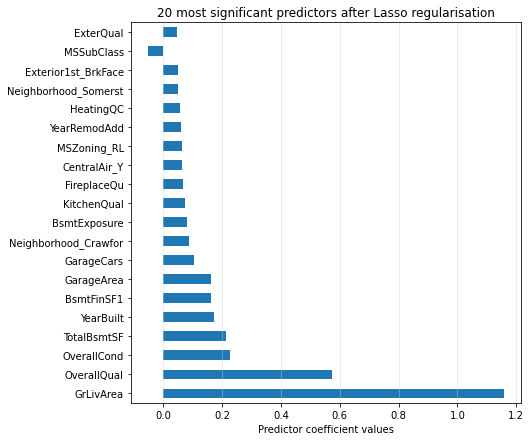

In [51]:
# Plot 20 largest coefficients
fig, ax = plt.subplots(figsize=(7,7))
title = '20 most significant predictors after Lasso regularisation'
gs_coeffs.Coef[:20].plot(kind='barh', ax=ax)
ax.set_yticklabels(gs_coeffs.Feature[:20].values)
ax.set_xlabel('Predictor coefficient values')
ax.set_title(title)

# Add a vertical grid to the plot
ax.xaxis.grid(True, linestyle='-', which='both', color='lightgrey', alpha=0.5)
ax.set_xticks(range(-1, 1, .01), minor=True)

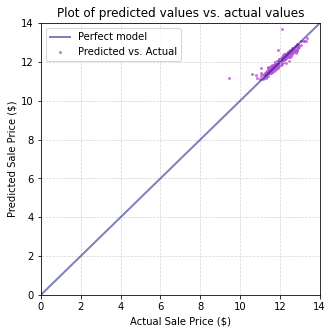

In [52]:
# Plot predictions for test data from optimum lasso model vs actual sale prices
y_test_predict = gs.predict(X_test)
plot_y_yhat(y_test, y_test_predict)

### Permutations 

In [53]:
from sklearn.inspection import permutation_importance

In [54]:
all_features = X_train.columns.values
all_features

array(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'MoSold', 'YrSold', 'TotalPorchSF',
       'TotalBR', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_I (all)',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_Gr

(90.0, 126.44)

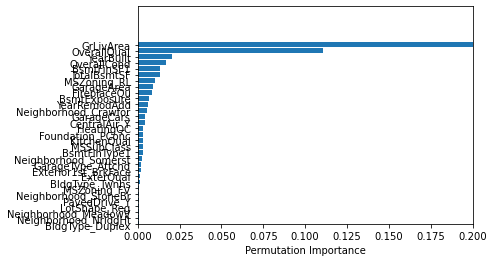

In [59]:
perm_importance = permutation_importance(gs, X_train, y_train)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(all_features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

plt.xlim([0, .20])
plt.ylim(bottom=90)

In [60]:
importances_df = pd.DataFrame(
    importances, columns = ["feature", "mean_importance", "std_importance"])
importances_df

NameError: name 'importances' is not defined

### Lasso Visualization

In [61]:
alphas = np.logspace(-4, 4, 10) #np.linspace(1e-4,1, 500) 

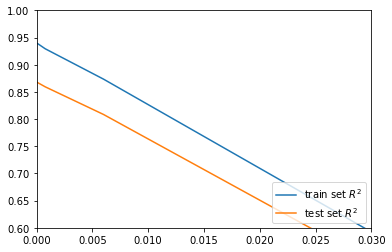

In [62]:
lasso = Lasso(max_iter = 10000)
coefs = []
r2_train =[]
r2_test =[]
norm = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
    r2_train.append(lasso.score(X_train, y_train))
    r2_test.append(lasso.score(X_test, y_test))
    ##add some MSE
    
#print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
#print(r2_score(y_train, pred_train_lasso))
 
plt.plot(alphas, r2_train, label=r'train set $R^2$')
plt.plot(alphas, r2_test, label=r'test set $R^2$')

plt.xlim([0, .03])
plt.ylim([.6, 1])
plt.legend(loc=4)


(-0.5, 2.5)

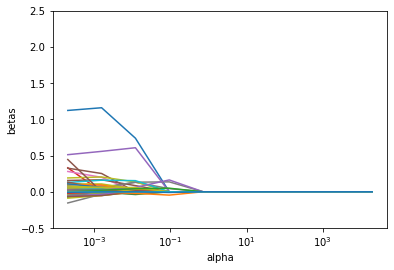

In [63]:
#coefficients vs alphas
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('betas')
plt.ylim([-.5, 2.5])

In [65]:
reg = Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=10000, tol=0.0001)


In [66]:
reg.fit(X_train, y_train)
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)


Lasso Regression: R^2 score on training set 93.87790627862076
Lasso Regression: R^2 score on test set 86.70708777072736


In [67]:
X.describe()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,MoSold,YrSold,TotalPorchSF,TotalBR,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
count,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000
mean,0.264578,0.222763,0.125229,0.041082,0.560002,0.577172,0.712465,0.561604,0.061734,0.456809,0.523152,0.690015,0.584909,0.400629,0.600229,0.194008,0.034816,0.230523,0.322995,0.783251,0.232131,0.179126,0.004006,0.474466,0.619760,0.398212,0.149771,0.349848,0.348933,0.313099,0.562957,0.564787,0.067337,0.468092,0.459889,0.072648,0.173046,0.006860,0.043445,0.000762,0.008003,0.776296,0.164253,0.027439,0.004954,0.638338,0.003811,0.011433,0.039634,0.015244,0.091463,0.035823,0.064405,0.055259,0.003049,0.000762,0.030488,0.000381,0.014482,0.040015,0.158918,0.008765,0.047256,0.025534,0.046875,0.082698,0.016006,0.05

### Creating some functions:

In [68]:
#import packages 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import RidgeCV, LassoCV

In [69]:
# Function for scoring training set
def train_scores(model, X, y):
    '''
    model: fitted model
    X: Matrix of explanatory variables (train set)
    y: Dependant variable (train set)
    '''
    model.fit(X, y)
    #cv_scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation

    print('Training Score:', np.round(model.score(X, y), 4))
    #print('Cross-validation scores:', np.round(cv_scores, 4))
    #print('Mean cross-validation score:', np.round(cv_scores.mean(), 4))

In [ ]:
# Function for scoring test set
def test_scores(model, X, y):
    '''
    model: fitted model
    X: Matrix of explanatory variables (test set)
    y: Dependant variable (test set)
    '''
    model.fit(X, y)
    print('Test Score:', np.round(model.score(X, y), 4))

In [ ]:
# Function for MSE & RMSE scoring
def accuracy_scores(model, X, y):
    '''
    model: fitted model
    X: Matrix of explanatory variables (test set)
    y: Dependant variable (test set)
    '''
    yhat = model.predict(X)
    print('Mean Squared Error:', np.round(metrics.mean_squared_error(y, yhat), 4)) 
    print('Root Mean Squared Error:', np.round((metrics.mean_squared_error(y, yhat))**0.5, 4)) 